In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
from PIL import Image

In [2]:
DPI = 200

def mm2px(mm):
    return int(round(mm * DPI / 25.4))

def px2mm(px):
    return int(round(px * 25.4 / DPI))

In [3]:
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_50)

(79, 79)


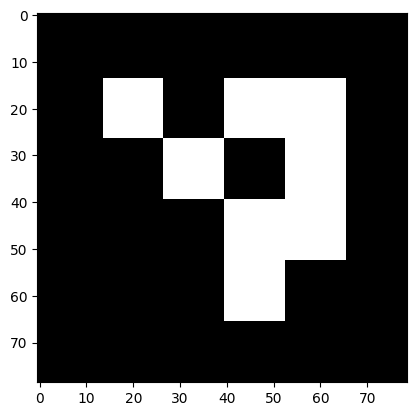

In [4]:
code = cv2.aruco.generateImageMarker(dictionary, 0, mm2px(10))
print(code.shape)
plt.imshow(code, cmap='gray')
plt.show()

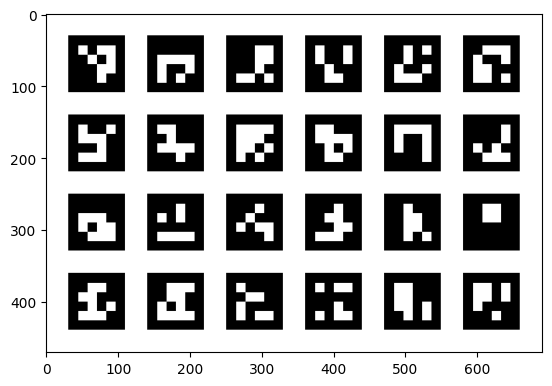

In [5]:
def generate_code_grid(rows, cols, code_size, spacing):
    grid = 255 * np.ones((spacing + rows * (code_size + spacing), spacing + cols * (code_size + spacing)), dtype=np.uint8)
    for row in range(rows):
        for col in range(cols):
            code = cv2.aruco.generateImageMarker(dictionary, row * cols + col, code_size)
            grid[row * (code_size + spacing) + spacing:(row + 1) * (code_size + spacing), col * (code_size + spacing) + spacing:(col + 1) * (code_size + spacing)] = code
    return grid

grid = generate_code_grid(4, 6, mm2px(10), mm2px(4))
img = Image.fromarray(grid)
img.save(f'grid.png', dpi=(DPI, DPI))
plt.imshow(grid, cmap='gray')
plt.show()